In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import plotly.express as px

In [2]:
med_df = pd.read_csv('Med_data_100k_sample.csv')

print(med_df.shape, 'Data read successfully')

(100000, 27) Data read successfully


In [3]:
med_df.head()

Unnamed: 0         npi nppes_provider_last_org_name  \
0     5090423  1518038496                      ZWIENER   
1     2087327  1205975224                        DAVIS   
2     8848954  1881845543                        RAMOS   
3     7935314  1790780021                          YEH   
4      748310  1073600938                   VIRAMONTES   

  nppes_provider_first_name nppes_provider_mi nppes_credentials  \
0                      JOHN                 R                MD   
1                      COLE               NaN              M.D.   
2                   GERALDO                 A                MD   
3                    GEORGE                 L                MD   
4                      JOSE               NaN              M.D.   

  nppes_provider_gender nppes_entity_code nppes_provider_street1  \
0                     M                 I       1008 W PIERCE ST   
1                     M                 I        10901 E 48TH ST   
2                     M                 I     620 10TH STREET N.   
3                     M                 I      3414 OLANDWOOD CT   
4                     M                 I          960 N 16TH ST   

  nppes_provider_street2  ... hcpcs_code  \
0               SUITE 1A  ...      88302   
1                    NaN  ...      87088   
2                    NaN  ...      99220   
3                    NaN  ...      73130   
4              SUITE 108  ...      36478   

                                   hcpcs_description hcpcs_drug_indicator  \
0  Pathology examination of tissue using a micros...                    N   
1                            Bacterial urine culture                    N   
2    Hospital observation care, typically 70 minutes                    N   
3                  X-ray of hand, minimum of 3 views                    N   
4  Laser destruction of incompetent vein of arm o...                    N   

  line_srvc_cnt bene_unique_cnt bene_day_srvc_cnt  \
0          13.0            12.0              12.0   
1          91.0            80.0              86.0   
2          14.0            14.0              14.0   
3          43.0            30.0              42.0   
4          12.0            12.0              12.0   

  average_Medicare_allowed_amt average_submitted_chrg_amt  \
0                     7.030000                   7.030000   
1                     9.990000                  25.000000   
2                   190.420000                 424.714286   
3                    36.101395                 115.950000   
4                   263.392500                1002.333333   

  average_Medicare_payment_amt average_Medicare_standard_amt  
0                     5.451538                      5.921538  
1                     9.790000                      9.790000  
2                   149.290000                    148.740000  
3                    26.387674                     23.711163  
4                   202.717500                    217.568333  

[5 rows x 27 columns]

In [4]:
med_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 27 entries, Unnamed: 0 to average_Medicare_standard_amt
dtypes: float64(8), int64(2), object(17)
memory usage: 20.6+ MB


In [5]:
med_df.columns

Index(['Unnamed: 0', 'npi', 'nppes_provider_last_org_name',
       'nppes_provider_first_name', 'nppes_provider_mi', 'nppes_credentials',
       'nppes_provider_gender', 'nppes_entity_code', 'nppes_provider_street1',
       'nppes_provider_street2', 'nppes_provider_city', 'nppes_provider_zip',
       'nppes_provider_state', 'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'place_of_service', 'hcpcs_code',
       'hcpcs_description', 'hcpcs_drug_indicator', 'line_srvc_cnt',
       'bene_unique_cnt', 'bene_day_srvc_cnt', 'average_Medicare_allowed_amt',
       'average_submitted_chrg_amt', 'average_Medicare_payment_amt',
       'average_Medicare_standard_amt'],
      dtype='object')

In [6]:
drug_code_desc = med_df[['hcpcs_code', 'hcpcs_description']]
npi = med_df[['npi', 'nppes_provider_last_org_name',
              'nppes_provider_first_name','nppes_provider_gender', 'nppes_entity_code']]
provider_location = med_df[['nppes_provider_city', 'nppes_provider_zip', 'nppes_provider_state', 'nppes_provider_country']]

In [7]:
# Will drop all non-US rows then drop the country column since we know they are all US
med_df['nppes_provider_country'].value_counts()

US    99982
XX       14
JP        1
GR        1
KR        1
DE        1
Name: nppes_provider_country, dtype: int64

<h2>Feature Selection</h2><br>
<details>
    <summary><b>Click here to see steps taken</b></summary> 
 <lo>
    <li>Check for total missing values in each column</li>
    <li>Get the indexes for the rows to be dropped</li>
    <li>Drop the rows with unwanted coutries then drop the country column</li>
    </lo>
</details>  

In [8]:
med_df.isna().sum()

Unnamed: 0                              0
npi                                     0
nppes_provider_last_org_name            0
nppes_provider_first_name            4167
nppes_provider_mi                   30235
nppes_credentials                    7385
nppes_provider_gender                4167
nppes_entity_code                       0
nppes_provider_street1                 14
nppes_provider_street2              62890
nppes_provider_city                    14
nppes_provider_zip                     14
nppes_provider_state                    0
nppes_provider_country                  0
provider_type                           0
medicare_participation_indicator        0
place_of_service                        0
hcpcs_code                              0
hcpcs_description                       0
hcpcs_drug_indicator                    0
line_srvc_cnt                           0
bene_unique_cnt                         0
bene_day_srvc_cnt                       0
average_Medicare_allowed_amt      

In [9]:
# Dropping the rows with countries not the US.
try:
    non_us_idx = med_df[med_df['nppes_provider_country'] != 'US'].index
    for i in non_us_idx:
        med_df.drop(i, inplace=True) 
    display(med_df.shape)
except KeyError:
    print('The rows have been dropped.')

(99982, 27)

In [10]:
# Drops the country column since it's all US.
try:
    med_df.drop('nppes_provider_country', axis=1, inplace=True) 
    display(med_df.shape)
except KeyError:
    print('The column has been dropped or does not exist.')

(99982, 26)

In [11]:
# Creating a copy of the dataframe for later use.
med_df_copy = med_df.drop('Unnamed: 0', axis=1)
med_df_copy.shape

(99982, 25)

In [12]:
# Columns to be dropped.
drop_col_list = ['npi', 'Unnamed: 0', 'nppes_provider_last_org_name', 'nppes_provider_first_name', 
                 'nppes_provider_mi', 'nppes_credentials', 'nppes_entity_code', 'nppes_provider_street1',
                 'nppes_provider_street2', 'nppes_provider_city', 'nppes_provider_zip', 'nppes_provider_state'
                 , 'hcpcs_description']

In [13]:
def drop_cols(data_frame, columns):
    '''
    This function drops the column or list of columns passed to it from a dataframe.
    '''
    for i in columns:
        data_frame.drop(i, axis=1, inplace=True)

In [14]:
try:
    drop_cols(data_frame=med_df, columns=drop_col_list)
    print('Done')
except KeyError:
    print('Error in column list.')
med_df.head(3)

Done


nppes_provider_gender provider_type medicare_participation_indicator  \
0                     M     Pathology                                Y   
1                     M       Urology                                Y   
2                     M    Cardiology                                Y   

  place_of_service hcpcs_code hcpcs_drug_indicator  line_srvc_cnt  \
0                F      88302                    N           13.0   
1                O      87088                    N           91.0   
2                F      99220                    N           14.0   

   bene_unique_cnt  bene_day_srvc_cnt  average_Medicare_allowed_amt  \
0             12.0               12.0                          7.03   
1             80.0               86.0                          9.99   
2             14.0               14.0                        190.42   

   average_submitted_chrg_amt  average_Medicare_payment_amt  \
0                    7.030000                      5.451538   
1                   25.000000                      9.790000   
2                  424.714286                    149.290000   

   average_Medicare_standard_amt  
0                       5.921538  
1                       9.790000  
2                     148.740000

### Filling missing values.
The missing values in the gender were replaced with "__O__" which stands for ___Organization___

In [15]:
if med_df['nppes_provider_gender'].isna().any():
    med_df['nppes_provider_gender'].fillna('O', inplace=True)


### Summary Statistics

In [16]:
med_df.describe()

line_srvc_cnt  bene_unique_cnt  bene_day_srvc_cnt  \
count   99982.000000     99982.000000       99982.000000   
mean      243.650490        83.146446         132.028095   
std      2816.707524       564.722355        1001.916448   
min        11.000000        11.000000          11.000000   
25%        20.000000        17.000000          20.000000   
50%        43.000000        32.000000          40.000000   
75%       117.000000        75.000000         106.000000   
max    451020.000000    109820.000000      233863.000000   

       average_Medicare_allowed_amt  average_submitted_chrg_amt  \
count                  99982.000000                99982.000000   
mean                     104.096237                  367.469552   
std                      297.517642                 1130.628714   
min                        0.010000                    0.010000   
25%                       22.890000                   60.000000   
50%                       66.534054                  150.000000   
75%                      114.270000                  307.000000   
max                    41448.368846                99999.990000   

       average_Medicare_payment_amt  average_Medicare_standard_amt  
count                  99982.000000                   99982.000000  
mean                      79.581669                      80.052635  
std                      232.059221                     234.280146  
min                        0.006659                       0.006659  
25%                       19.248377                      20.003965  
50%                       48.431004                      49.186300  
75%                       86.444815                      85.817496  
max                    32495.519231                   32495.520769

<AxesSubplot:>

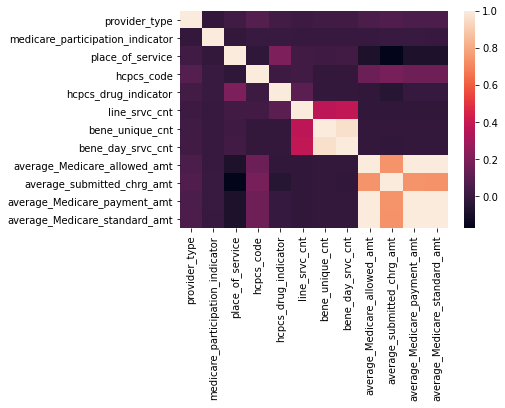

In [50]:
sns.heatmap(med_df.corr())

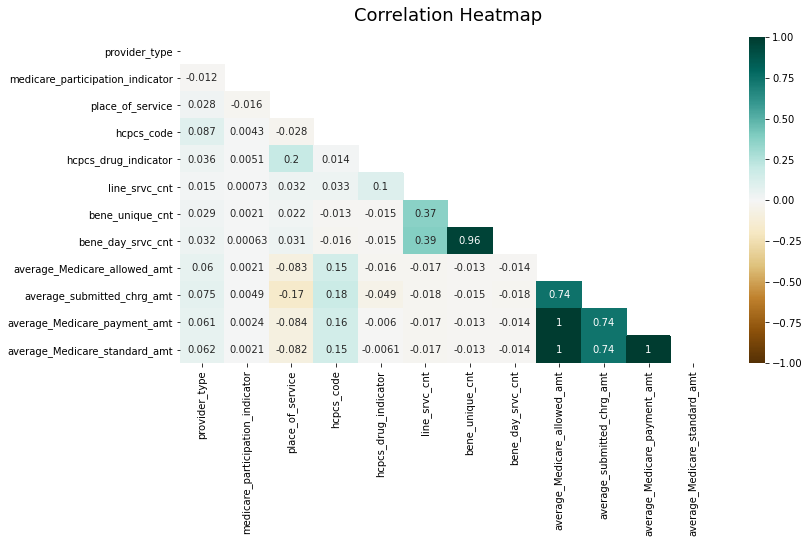

In [51]:
plt.figure(figsize=(12, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(med_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(med_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

### Encoding the columns

Encodiing the <strong>Provider type</strong> and <strong>hcpcs_code</strong> columns.

In [17]:
# Creating a dict for the provider type
provd_type_code = dict(zip(med_df['provider_type'].unique(), range(5, len(med_df['provider_type'].unique()) + 5)))
med_df['provider_type'].value_counts()

provd_type_code.get('Diagnostic Radiology')

12

In [18]:
# encoding the provider type
for desc_ in med_df['provider_type'].unique():
    med_df['provider_type'].replace(desc_, provd_type_code.get(desc_), inplace=True)

In [19]:
# creating a dict for the hcpcs_code

hcp_code = dict(zip(med_df['hcpcs_code'].unique(), range(10, len(med_df['hcpcs_code'].unique()) + 10)))
hcp_code

{'88302': 10,
 '87088': 11,
 '99220': 12,
 '73130': 13,
 '36478': 14,
 '76770': 15,
 '76942': 16,
 '90837': 17,
 '73562': 18,
 '64493': 19,
 '80305': 20,
 '93010': 21,
 '99344': 22,
 '99282': 23,
 '99310': 24,
 '99211': 25,
 '97530': 26,
 '99309': 27,
 '73110': 28,
 '74177': 29,
 '93880': 30,
 '73718': 31,
 '72148': 32,
 '00731': 33,
 '11043': 34,
 '99203': 35,
 '99214': 36,
 '82570': 37,
 '72158': 38,
 '68761': 39,
 '36415': 40,
 'A0425': 41,
 '20610': 42,
 '93000': 43,
 '99212': 44,
 '87880': 45,
 '29826': 46,
 '96372': 47,
 '72131': 48,
 'Q0091': 49,
 '99217': 50,
 '70496': 51,
 '99223': 52,
 '93280': 53,
 '99308': 54,
 '99232': 55,
 '17110': 56,
 '83020': 57,
 '97161': 58,
 '99213': 59,
 'J1200': 60,
 '93224': 61,
 '93922': 62,
 '99233': 63,
 '23600': 64,
 '93308': 65,
 'G0009': 66,
 '71046': 67,
 'J9217': 68,
 '85652': 69,
 '83036': 70,
 '70450': 71,
 '92083': 72,
 '99283': 73,
 '93016': 74,
 '80053': 75,
 '77332': 76,
 '99215': 77,
 '87804': 78,
 '76937': 79,
 '83550': 80,
 '8300

In [20]:
# encoding the hcpcs_code 
for code_ in med_df['hcpcs_code'].unique():
    med_df['hcpcs_code'].replace(code_, hcp_code.get(code_), inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [22]:
le = LabelEncoder()

In [23]:
med_df['medicare_participation_indicator'] = le.fit_transform(med_df['medicare_participation_indicator'])
med_df['place_of_service'] = le.fit_transform(med_df['place_of_service'])
med_df['hcpcs_drug_indicator'] = le.fit_transform(med_df['hcpcs_drug_indicator'])

med_df.head(3)

nppes_provider_gender  provider_type  medicare_participation_indicator  \
0                     M              5                                 1   
1                     M              6                                 1   
2                     M              7                                 1   

   place_of_service  hcpcs_code  hcpcs_drug_indicator  line_srvc_cnt  \
0                 0          10                     0           13.0   
1                 1          11                     0           91.0   
2                 0          12                     0           14.0   

   bene_unique_cnt  bene_day_srvc_cnt  average_Medicare_allowed_amt  \
0             12.0               12.0                          7.03   
1             80.0               86.0                          9.99   
2             14.0               14.0                        190.42   

   average_submitted_chrg_amt  average_Medicare_payment_amt  \
0                    7.030000                      5.451538   
1                   25.000000                      9.790000   
2                  424.714286                    149.290000   

   average_Medicare_standard_amt  
0                       5.921538  
1                       9.790000  
2                     148.740000

<h6>Splitting the dataframe into object type and non object type.</h6>

In [24]:
# Dataframe of non-object type
med_df_non_obj = med_df.drop(['nppes_provider_gender'], axis=1) 

# Dataframe of object type
med_df_obj = med_df.drop(med_df.columns.difference(['nppes_provider_gender']), axis=1)

In [25]:
# Encoding the gender with OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['nppes_provider_gender'])], remainder='passthrough')
med_df_o = ct.fit_transform(med_df_obj)

In [26]:
med_df_obj2 = pd.DataFrame(med_df_o)
med_df_obj2

0    1    2
0      0.0  1.0  0.0
1      0.0  1.0  0.0
2      0.0  1.0  0.0
3      0.0  1.0  0.0
4      0.0  1.0  0.0
...    ...  ...  ...
99977  0.0  1.0  0.0
99978  1.0  0.0  0.0
99979  0.0  1.0  0.0
99980  1.0  0.0  0.0
99981  0.0  1.0  0.0

[99982 rows x 3 columns]

### Normalizing the dataset

In [27]:
# Creating an instance of the MinMAxScaler class
scaler = MinMaxScaler() 

In [28]:
headers_non_obj = med_df_non_obj.columns

In [29]:
# scaling the non-object dataframe
med_df_non_obj = scaler.fit_transform(med_df_non_obj)

In [30]:
# Data Normalized
med_df_non_obj = pd.DataFrame(med_df_non_obj, columns=headers_non_obj)
med_df_non_obj

provider_type  medicare_participation_indicator  place_of_service  \
0           0.000000                               1.0               0.0   
1           0.010870                               1.0               1.0   
2           0.021739                               1.0               0.0   
3           0.032609                               1.0               1.0   
4           0.043478                               1.0               0.0   
...              ...                               ...               ...   
99977       0.021739                               1.0               0.0   
99978       0.076087                               1.0               0.0   
99979       0.076087                               1.0               0.0   
99980       0.097826                               1.0               1.0   
99981       0.021739                               1.0               1.0   

       hcpcs_code  hcpcs_drug_indicator  line_srvc_cnt  bene_unique_cnt  \
0        0.000000                   0.0       0.000004         0.000009   
1        0.000380                   0.0       0.000177         0.000628   
2        0.000760                   0.0       0.000007         0.000027   
3        0.001140                   0.0       0.000071         0.000173   
4        0.001520                   0.0       0.000002         0.000009   
...           ...                   ...            ...              ...   
99977    0.160714                   0.0       0.000009         0.000036   
99978    0.003040                   0.0       0.000007         0.000009   
99979    0.015578                   0.0       0.000022         0.000091   
99980    0.004179                   0.0       0.000002         0.000009   
99981    0.024316                   0.0       0.000273         0.001120   

       bene_day_srvc_cnt  average_Medicare_allowed_amt  \
0               0.000004                      0.000169   
1               0.000321                      0.000241   
2               0.000013                      0.004594   
3               0.000133                      0.000871   
4               0.000004                      0.006354   
...                  ...                           ...   
99977           0.000017                      0.000312   
99978           0.000004                      0.000223   
99979           0.000043                      0.002127   
99980           0.000004                      0.000175   
99981           0.000526                      0.000543   

       average_submitted_chrg_amt  average_Medicare_payment_amt  \
0                        0.000070                      0.000168   
1                        0.000250                      0.000301   
2                        0.004247                      0.004594   
3                        0.001159                      0.000812   
4                        0.010023                      0.006238   
...                           ...                           ...   
99977                    0.002150                      0.000291   
99978                    0.000450                      0.000212   
99979                    0.006560                      0.002084   
99980                    0.000170                      0.000148   
99981                    0.000720                      0.000500   

       average_Medicare_standard_amt  
0                           0.000182  
1                           0.000301  
2                           0.004577  
3                           0.000729  
4                           0.006695  
...                              ...  
99977                       0.000292  
99978                       0.000238  
99979                       0.002087  
99980                       0.000150  
99981                       0.000504  

[99982 rows x 12 columns]

In [31]:
# Joining the object and non-object type dataframes.

norm_med_df = pd.concat([med_df_obj2, med_df_non_obj], axis=1)
norm_med_df.shape

(99982, 15)

In [32]:
norm_med_df.rename(columns={0: 'F', 1: 'M', 2: 'O'}, inplace=True)

In [33]:
norm_med_df.shape

(99982, 15)

<h2>Training the model</h2>

In [34]:
from sklearn.ensemble import IsolationForest

In [35]:
model_ = IsolationForest(contamination=0.35) # Creating an instance of the IForest class

In [36]:
model_.fit(norm_med_df)

IsolationForest(contamination=0.35)

In [37]:
# Predicting anomalies
pred_values = model_.predict(norm_med_df)
pred_values.shape

(99982,)

In [38]:
(pred_values < 0).mean() * 100# Checking the contamination level

35.00030005400972

In [39]:
abnor_id_ = np.where(pred_values < 0) # Getting the indices of the flagged observations.

In [40]:
pred_values_df = pd.DataFrame(pred_values, columns=['Pred_value'])

In [41]:
# combining the predicted values and main df
result = pd.concat([med_df_copy, pred_values_df],axis=1)

result.head()

npi nppes_provider_last_org_name nppes_provider_first_name  \
0  1.518038e+09                      ZWIENER                      JOHN   
1  1.205975e+09                        DAVIS                      COLE   
2  1.881846e+09                        RAMOS                   GERALDO   
3  1.790780e+09                          YEH                    GEORGE   
4  1.073601e+09                   VIRAMONTES                      JOSE   

  nppes_provider_mi nppes_credentials nppes_provider_gender nppes_entity_code  \
0                 R                MD                     M                 I   
1               NaN              M.D.                     M                 I   
2                 A                MD                     M                 I   
3                 L                MD                     M                 I   
4               NaN              M.D.                     M                 I   

  nppes_provider_street1 nppes_provider_street2 nppes_provider_city  ...  \
0       1008 W PIERCE ST               SUITE 1A            CARLSBAD  ...   
1        10901 E 48TH ST                    NaN               TULSA  ...   
2     620 10TH STREET N.                    NaN      ST. PETERSBURG  ...   
3      3414 OLANDWOOD CT                    NaN               OLNEY  ...   
4          960 N 16TH ST              SUITE 108         SPRINGFIELD  ...   

                                   hcpcs_description hcpcs_drug_indicator  \
0  Pathology examination of tissue using a micros...                    N   
1                            Bacterial urine culture                    N   
2    Hospital observation care, typically 70 minutes                    N   
3                  X-ray of hand, minimum of 3 views                    N   
4  Laser destruction of incompetent vein of arm o...                    N   

  line_srvc_cnt bene_unique_cnt bene_day_srvc_cnt  \
0          13.0            12.0              12.0   
1          91.0            80.0              86.0   
2          14.0            14.0              14.0   
3          43.0            30.0              42.0   
4          12.0            12.0              12.0   

  average_Medicare_allowed_amt average_submitted_chrg_amt  \
0                     7.030000                   7.030000   
1                     9.990000                  25.000000   
2                   190.420000                 424.714286   
3                    36.101395                 115.950000   
4                   263.392500                1002.333333   

  average_Medicare_payment_amt  average_Medicare_standard_amt  Pred_value  
0                     5.451538                       5.921538         1.0  
1                     9.790000                       9.790000         1.0  
2                   149.290000                     148.740000         1.0  
3                    26.387674                      23.711163         1.0  
4                   202.717500                     217.568333        -1.0  

[5 rows x 26 columns]

In [42]:
# dropping missing values.
result.dropna(subset=['Pred_value'], axis=0, inplace=True)

In [43]:
neg_one = result[result['Pred_value'] == -1] # filtering for the observations that were flagged as anomaly
fraud_id_no = neg_one[['npi']]

In [44]:
fraud_id_no[fraud_id_no.npi == 1346324829].index

Int64Index([95035], dtype='int64')

### Visualization of the distribution of outliers in the dataset

In [52]:
fig = px.scatter(result.reset_index(), y='average_submitted_chrg_amt', x='average_Medicare_allowed_amt', color='Pred_value')

fig.show()

Predict_value = -1 indicates an outlier (anomaly)